# Task 4

In [354]:
import matplotlib.pyplot as plt
from time import time
# !pip install tqdm
from tqdm import tqdm
import numpy as np
from scipy import linalg as lg
from scipy.optimize import minimize
import scipy
import time
from sklearn.linear_model import LinearRegression

# Task 4.1

Реализовать генератор матрциц, который должен поддерживать функции:
* Генерация абсолютно случайной матрицы $n\times m$
* Генерация случайной диагональной матрицы $n\times n$
* Генерация случайной верхнетреугольной матрицы
* Генерация случайной нижнетреугольной матрицы
* Генерация симметричной матрицы
* Генерация вырожденной матрицы
* Генерация матрицы ступенчатого вида $n\times n$ ранга $m$
* Генерация возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$. Оценить величину нормы матрицы возмущений в зависимости от параметра $\varepsilon$ (оценить верхную границу).

Оценить численно вероятность того, что созданная матрица будет вырожденной для какого-либо случая выше. 

In [487]:
import numpy as np

def matrix_generate(rows, columns, type_ = "full", eps = 10):
    """
    matrix_generate(rows, columns, type_ = "full")
    
    Создаёт случайную матрицу выбранного типа. 
    
    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".
    
    Parameters
    ----------
    
    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "upper_triangular", "symmetric" и т.д.
    eps: float, optional
        Дополнительное число, использующееся при генерации для некоторых типов матриц.
    
    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.
        
    Notes
    -----
    Поддерживаемые типы матриц:
        "full","upper_triangular",
        "symmetric",
        ...
    
    
    """
    
    A = None

    def jordan(n, a):
        A = np.eye(n, n)*a
        for i in range(n-1):
            A[i, i+1] = 1
        return A
    
    if type_ == "full":
        A = np.random.random(size=(rows, columns))
        
    elif type_ == "upper_triangular":
        
        A = np.random.random(size=(rows, columns))

        for i in range(rows):
            for j in range(columns):
                if (i > j):
                    A[i, j] = 0
    
        # Для нижнетреугольной подумайте, как сделать без циклов for :) (звёздочка)
    
    elif type_ == "lower_triangular":
        
        A = np.random.random(size=(rows, columns))

        for i in range(rows):
            for j in range(columns):
                if (i < j):
                    A[i, j] = 0

    elif type_ == "diag":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        A = np.random.random(size=(rows, columns))
        A = np.diag(np.diag(A))

    elif type_ == "symmetric":
        
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"
        
        else:
            
            A = np.random.random(size=(rows, columns))
        
            for i in range(rows):
                for j in range(columns):
                    if (i > j):
                        A[i, j] = A[j, i]
                        
            # И эту секцую тоже перепишите без for (звёздочка). Учтите, что портить uniform распределение нельзя.

    elif type_ == 'stup':
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        A = np.random.random(size=(rows, rows))
        # print(A)
        r = columns
        N = np.random.randint(1, r)

        flag = True
        while flag:
            m = np.random.choice(np.arange(r), size=N, replace=False)
            m = np.sort(m)
            if m.shape[0] == 1 and m[0] == 0:
                pass
            else:
                break
        # print(m)
        # if len(m) == 1:
        #     print(m[0])

        m_ = 0
        for i in range(rows):
            if i == 0 and i not in m:
                A[m[0]:, i] = np.zeros(rows - m[i])
            elif i == rows-1 and i not in m:
                pass
            elif i not in m:
                A[m[m_]:, i] = np.zeros(rows - m[m_])
            else:
                A[m[m_]:, i] = np.zeros(rows - m[m_])
                if len(m) != 0 and m_ != len(m)-1: m_ += 1

    elif type_ == 'degen':
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"
        
        A = np.zeros((rows,rows))
        n = np.random.randint(1, rows+1)
        # print(n)
        lamb = np.random.randint(0, 10, (n,))
        zer = np.sort(np.random.choice(np.arange(0, n), size=np.random.randint(1,n+1), replace=False))
        # print(lamb, zer)
        lamb[zer] = 0
        m = np.sort(np.random.choice(np.arange(1, rows), size=n-1, replace=False))
        # print(m)
        m = np.concatenate(([0], m))
        m = np.concatenate((m, [rows]))
        # print(m)
        for i in range(n):
            A[m[i]:m[i+1], m[i]:m[i+1]] = jordan(m[i+1]-m[i], lamb[i])
        
        B = np.random.randint(0, 10, (rows,rows))
        return B@A@np.linalg.inv(B)
        # A = jordan(rows, 2)
    
    elif type_ == 'vozm':
        A = np.random.choice(np.linspace(-eps, eps, 10000), size=(rows, columns))

    return A

In [489]:
voc = ['vozm', 'stup', 'symmetric', 'diag', 'lower_triangular', 'upper_triangular', 'full']

N = 10000
for elem in voc:
    n = 0
    for _ in range(N):
        if np.linalg.matrix_rank(matrix_generate(5, 5, elem)) < 5:
            n += 1
    print(f'for {elem}: p = {n/N}')

for vozm: p = 0.0
for stup: p = 1.0
for symmetric: p = 0.0
for diag: p = 0.0
for lower_triangular: p = 0.0
for upper_triangular: p = 0.0
for full: p = 0.0


In [491]:
matrix_generate(3, 3, type_='stup')

array([[0.97396426, 0.64792153, 0.85828963],
       [0.        , 0.        , 0.52661704],
       [0.        , 0.        , 0.29766668]])

In [391]:
n = 4
A = matrix_generate(n,n, 'degen')
print(A)
print(np.linalg.matrix_rank(A))
# print(scipy.linalg.eigvals(A))

[[-0.85435057  1.24211854 -0.02711223  1.52900378]
 [ 1.04161412  0.6406053  -0.43631778 -1.27742749]
 [ 0.89470366  0.77301387 -0.88083228 -0.46469105]
 [-0.76418663  0.96343001  0.19419924  1.09457755]]
3


In [467]:
matrix_generate(3, 3, 'vozm', eps=100)

array([[ 30.93093093, -66.36636637,  57.95795796],
       [ 76.17617618,  97.3973974 ,  -3.5035035 ],
       [-78.57857858, -99.1991992 , -40.94094094]])

## Task 4.2

$$L_1, L_2, L_{\infty}$$

In [440]:
from scipy import linalg

def Norma(A, type_='inf'):
    norma = None
    if type_ == 'inf':
        if len(A.shape) == 1:
            norma = A.max()
        else:
            # B = np.sum(np.abs(A), axis=1).max()
            # print(B)
            norma = np.sum(np.abs(A), axis=1).max()

    if type_ == 'L1':
        if len(A.shape) == 1:
            norma = np.sum(np.abs(A))
        else:
            norma = np.sum(np.abs(A.T), axis=1).max()

    if type_ == 'L2':
        if len(A.shape) == 1:
            norma = np.sqrt(np.sum(A**2))
        else:
            norma = np.sqrt(linalg.eigvals(A.T@A).max())
    
    return norma

def chisl_obus(A, type_ = 'inf'):
    if type_ == 'L1':
        return Norma(A, type_=type_)*Norma(np.linalg.inv(A), type_=type_)
    elif type_ == 'inf':
        return Norma(A.T, type_='L1')*Norma(np.linalg.inv(A.T), type_='L1')
    elif type_ == 'L2':
        l = scipy.linalg.eigvals(A@A.T)
        return np.sqrt(np.max(l)/np.min(l))
    else:
        return Norma(A, type_)*Norma(linalg.inv(A), type_)



# A = np.array([1, 2, 3])
# A = np.array([[1, 2, 3], [4,5,6]])
A = np.random.random((4, 4))
print(Norma(A, type_='inf'))
print(Norma(A, type_='L1'))
print(Norma(A, type_='L2'))
print(chisl_obus(A, type_='inf'))
print(chisl_obus(A, type_='L1'))
print(chisl_obus(A, type_='L2'))

2.9026334104101146
3.597074355518628
(2.6598884119138524+0j)
67.39210789248762
99.60510323976526
(50.33510888618299+0j)


## Task 4.3

In [412]:
def gauss(A, slu=False):
    # A = A.astype('float32')
    # print(b.reshape(-1, 1))
    # B = np.concatenate((A, b.reshape(-1, 1)), axis=1)
    # print(A)
    n = 0
    k = 0
    if slu: k = 1
    for i in range(A.shape[1]-k):
        flag = False
        for j in range(n, A.shape[0]):
            if A[j, i] != 0 or np.abs(A[j, i]) > 1e-3:
                flag = True
                if j == n:
                    break
                else:
                    A[[n, j], i] = A[[j, n], i]
                    break
        
        if flag:
            A[n, :] = A[n, :]/A[n, i]
            tmp = i+1
            if slu: tmp = 0
            for j in range(tmp, A.shape[0]):
                if n != j:
                    A[j, :] -= A[n, :]*A[j, i]
        # print(A)
        n += 1

    return A

def rk(A):
    A = gauss(A)
    print(A)
    # print(A.sum(axis=1))
    A = A.sum(axis=1)
    n = A[A != 0].shape[0]
    return n
            

    # print(B)

In [413]:
A = np.array([[3,2,-5],[2,-1,3],[1,2,-1]], dtype=np.float32)
print(gauss(A))
# A = np.random.rand(3, 3)
# print(A)
# print(gauss(A))
# b = np.array([-1,13,9]).astype('float32')
# A = np.array([[4,-3,2,-1],[3,-2,1,-3],[5,-3,1,-8]]).astype('float32')
# b = np.array([8,7,1]).astype('float32')
# B = np.array([[7,-2,-1],[6,-4,-5],[1,2,4]]).astype('float16')
# b = np.array([2,3,5]).astype('float32')
# B = np.concatenate((A, b.reshape(-1, 1)), axis=1)
# B = np.array([[1,2,3,4],[0,1,-1,2],[0,1,-1,2],[0,2,-2,4]]).astype('float32')
# A = np.random.rand(3,3)
# # gauss(B, True)


[[ 1.         0.6666667 -1.6666666]
 [-0.         1.        -2.7142854]
 [ 0.         0.         1.       ]]


In [475]:
n = 4
A = matrix_generate(n, n, 'degen')
print(A)
# print(scipy.linalg.eigvals(A))
print(np.linalg.matrix_rank(A))
# print(np.linalg.det(A))
# print(A)
print(rk(A))

[[ 0.15684932  2.64726027 -1.59178082  1.51780822]
 [ 0.60479452  9.92808219 -5.33424658  0.54246575]
 [-0.50684932  3.60273973 -1.80821918  2.08219178]
 [ 3.88972603  0.65410959 -3.11232877  6.72328767]]
3
[[  1.          16.87772926 -10.14847162   9.6768559 ]
 [ -0.           1.          -2.875       19.        ]
 [  0.           0.           1.          -8.        ]
 [  0.           0.           0.           0.        ]]
3


## Task 4.4

In [340]:
def SLU(A):
    A = gauss(A, True)
    # print(A)
    return A[:, -1].T

In [408]:
type_ = 'float32'
A = np.array([[3,2,-5, 1],[2,-1,3,2],[1,2,-1,3]]).astype(type_)
# A = np.array([[3,2,-5, 1],[2,-1,3,2],[1,2,-1,3]])
SLU(A)

array([0.6000001, 1.5999999, 0.8000001], dtype=float32)

In [359]:
n = np.arange(100, 850, 50)

t = []
num = 10
for n_ in tqdm(n):
    tmp = 0
    for _ in range(num):
        A = np.random.random((n_, n_+1))
        start = time.time()
        SLU(A)
        tmp += time.time() - start
    t.append(tmp/num)

100%|██████████| 15/15 [09:01<00:00, 36.07s/it]


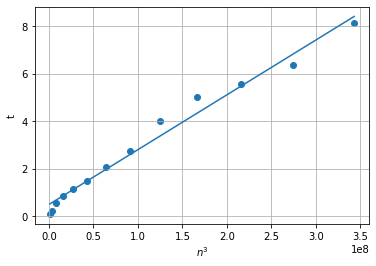

In [382]:
x, y = n[:-2]**3, t[:-2]
x, y = np.array(x), np.array(y)
plt.scatter(x, y)
regr = LinearRegression()
# x_, y_ = x[2:], np.log(y[2:])
regr.fit(x.reshape((-1, 1)), y)
y_pred = regr.predict(x.reshape((-1, 1)))
plt.plot(x, y_pred)
# plt.yscale('log')
plt.xlabel('$n^3$')
plt.ylabel('t')
plt.grid()
plt.show()

Метод Гаусса имеет сложность (для матрицы $n\times m$) $O(mn^2)$